# Load Preprocessed Data

In [46]:
import numpy as np
import pandas as pd

df = pd.read_csv('cleaned-data-kbk.csv')
df.head()

,Unnamed: 0,id,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,0,1,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus untuk tentu dosen ...,sistem dukung putus spk rupa suatu sistem yang...
1,1,3,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi diri dengan kesiap kerja lulus ...,pandemi covid 19 yang landa dunia utama indone...
2,2,4,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek ca...,tuju laku teliti ini untuk bantu sandang tuetr...
3,3,6,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru rupa sub transmisi listrik ya...
4,4,7,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis rupa mata ajar y...


# Split Data

In [47]:
from sklearn.model_selection import train_test_split

X = df['judul_tokens']
y = df['kbk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 2405)


# Oversampling: SMOTE

In [49]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [50]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Telematics loT System and Devices                                                194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Ketenegakerjaan Teknologi dan Kejuruan                                           194
Intelligent Power and Advanced energy System (IPAES)                             194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Game Technology and Machine Learning Applications                                194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control a

# Training Model

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'poly', 'sigmoid']
			}

grid = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

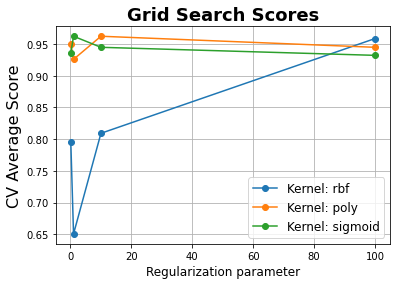

In [86]:
import matplotlib.pyplot as plt

def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=12)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=12)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid.cv_results_, param_grid['C'], param_grid['kernel'], 'Regularization parameter', 'Kernel')

In [92]:
from sklearn.svm import SVC

clf = SVC(C=10, kernel='rbf')
model = clf.fit(X_train_resampled,y_train_resampled)

# Evaluation

In [93]:
predictions = model.predict(X_test_tfidf)

In [94]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 0  0  1  2  2  0  0  2  0  0  0  0  6]
 [ 0  3  0  0  0  1  1  5  0  0  5  0  0]
 [ 0  0 18  0  1  0  0  3  5  0  0  0  0]
 [ 0  0  1 10 12  0  0  1  0  0  0  0  0]
 [ 0  0  0  5 17  0  0  0  0  0  0  0  0]
 [ 0  5  0  1  0 15  9  1  0  0  0  0  0]
 [ 0  1  0  0  0  3  9  3  0  0  7  0  0]
 [ 0  0  0  0  0  0  0 76  0  0 11  0  1]
 [ 0  0  5  0  2  0  1  0 25  0  0  0  0]
 [ 0  0  0  0  4  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0 20  0  0 42  0  0]
 [ 0  0  3  1  2  0  0  2  0  0  0 13  0]
 [ 0  0  0  3  1  0  0  1  0  0  0  0  9]]


In [95]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.00      0.00      0.00        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.33      0.20      0.25        15
                            Game Technology and Machine Learning Applications       0.64      0.67      0.65        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.45      0.42      0.43        24
                         Intelligent Power and Advanced energy System (IPAES)       0.41      0.77      0.54        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.79      0.48      0.60        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.45      0.39      0.42        23
          Pengembangan Aplikasi dan Media Pembe

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.6236842105263158
Precision score :  0.6077103405182663
Recall score :  0.6236842105263158
F1 score :  0.602584821269954


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Export Model

In [60]:
from joblib import dump

dump(model, filename="svm-model.joblib")

['svm-model.joblib']